In [2]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
import re

# Télécharger les ressources nécessaires pour nltk
nltk.download('punkt')
nltk.download('stopwords')

# Définir le chemin du dossier parent contenant les dossiers de catégorie
chemin_dossier_parent = 'C:\\Users\\DELL\\Desktop\\ING2\\Projet Sem'

# Initialiser une liste pour stocker les données
donnees = []

# Initialiser le stemmer et le lemmatizer pour l'arabe
arabic_stemmer = ISRIStemmer()
lemmatizer = WordNetLemmatizer()

# Parcourir tous les fichiers dans le dossier parent
for dossier in os.listdir(chemin_dossier_parent):
    # Construire le chemin complet du dossier
    chemin_dossier = os.path.join(chemin_dossier_parent, dossier)

    # Vérifier si le chemin correspond à un dossier
    if os.path.isdir(chemin_dossier):
        # Parcourir tous les fichiers dans le dossier
        for fichier in os.listdir(chemin_dossier):
            # Vérifier si le fichier a l'extension ".txt"
            if fichier.endswith('.txt'):
                chemin_fichier = os.path.join(chemin_dossier, fichier)

                # Lire seulement 10% du fichier
                with open(chemin_fichier, 'r', encoding='utf-8') as file:
                    contenu = file.read(int(0.1 * os.path.getsize(chemin_fichier)))

                # Supprimer les caractères de nouvelle ligne (\n) du contenu
                contenu = contenu.replace('\n', ' ')

                # Supprimer les chiffres et les ponctuations
                contenu = re.sub(r'[\d' + re.escape(punctuation) + ']', '', contenu)

                # Tokenization
                tokens = word_tokenize(contenu)

                # Supprimer les stopwords
                stopwords_arabe = set(stopwords.words('arabic'))
                tokens_sans_stopwords = [mot for mot in tokens if mot not in stopwords_arabe]

                # Stemming
                tokens_stemming = [arabic_stemmer.stem(mot) for mot in tokens_sans_stopwords]

                # Lemmatization
                tokens_lemmatization = [lemmatizer.lemmatize(mot) for mot in tokens_stemming]

                # Ajouter le contenu du fichier, la catégorie, et les tokens à la liste
                donnees.append({
                    'Catégorie': dossier,
                    'Nom du Fichier': fichier,
                    'Contenu': contenu,
                    'Tokens': tokens,
                    'tokens_lemmatization':tokens_lemmatization
                })

# Créer un dataframe à partir de la liste
df = pd.DataFrame(donnees)

# Afficher le dataframe
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         Catégorie       Nom du Fichier  \
0  articlesCulture     culturecapr1.txt   
1  articlesCulture  culturecapr1005.txt   
2  articlesCulture  culturecapr1006.txt   
3  articlesCulture  culturecapr1007.txt   
4  articlesCulture  culturecapr1008.txt   

                                             Contenu  \
0  كتب سالم الرحبي  تنطلق اليوم الدورة البرامجية ...   
1  كتب  فيصل العلوي  شاركت السلطنة صباح امس دول ا...   
2  اربعة عروض على مسرح الشباب وعرض في الرستاق ثم ...   
3  حاوره خالد عبداللطيف  حين يناقش الموضوع الثقاف...   
4  افتتح صباح أمس بقاعة الموسيقي في جامعة السلطان...   

                                              Tokens  \
0  [كتب, سالم, الرحبي, تنطلق, اليوم, الدورة, البر...   
1  [كتب, فيصل, العلوي, شاركت, السلطنة, صباح, امس,...   
2  [اربعة, عروض, على, مسرح, الشباب, وعرض, في, الر...   
3  [حاوره, خالد, عبداللطيف, حين, يناقش, الموضوع, ...   
4  [افتتح, صباح, أمس, بقاعة, الموسيقي, في, جامعة,...   

                                tokens_lemmatization  
0  [كتب, سلم

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explorer le DataFrame
# Calculer le nombre total de mots dans la colonne 'tokens_sans_mots_frequents'
nombre_total_mots = df['tokens_lemmatization'].apply(len).sum()

# Afficher le résultat
print(f"Nombre total de mots : {nombre_total_mots}")
# Nombre total de mots dans chaque document
df['Nombre de Mots'] = df['tokens_lemmatization'].apply(len)
print('Nombre total de mots dans chaque document',df['Nombre de Mots'])

# Nombre total de mots par catégorie
mots_par_categorie = df.groupby('Catégorie')['Nombre de Mots'].sum()
print('Nombre total de mots par catégorie',mots_par_categorie)

# Nombre total de mots distincts
mots_distincts = set([mot for sublist in df['tokens_lemmatization'] for mot in sublist])
nombre_mots_distincts = len(mots_distincts)
print('Nombre total de mots distincts',nombre_mots_distincts)
# Mots les plus fréquents
mots_freq = pd.Series([mot for sublist in df['tokens_lemmatization'] for mot in sublist]).value_counts()
print('Mots les plus fréquents',mots_freq)



Nombre total de mots : 1385009
Nombre total de mots dans chaque document 0        403
1        130
2        105
3        295
4         55
        ... 
18251     32
18252     25
18253     36
18254     29
18255    148
Name: Nombre de Mots, Length: 18256, dtype: int64
Nombre total de mots par catégorie Catégorie
articlesCulture          195551
articlesEconomy          229760
articlesInternational    111437
articlesLocal            238476
articlesReligion         401954
articlesSports           207831
Name: Nombre de Mots, dtype: int64
Nombre total de mots distincts 17561
Mots les plus fréquents سلم             12825
علم             11833
جمع             11403
ان              10271
الل             10159
                ...  
اوكسيدنتال          1
فإ                  1
بنهايةشهر           1
كدش                 1
فيسيرستاديوم        1
Name: count, Length: 17561, dtype: int64


Mots les plus fréquents par catégorie :
                Catégorie Mot le plus fréquent
0        articlesCulture                  كتب
1        articlesEconomy                  عمل
2  articlesInternational                   ان
3          articlesLocal                   بن
4       articlesReligion                  الل
5         articlesSports                  نخب

Mots les moins fréquents par catégorie :
                Catégorie Mot le moins fréquent
0        articlesCulture                    بذ
1        articlesEconomy                   ووض
2  articlesInternational                  رنور
3          articlesLocal                   بتغ
4       articlesReligion                   تبق
5         articlesSports              دورالاول


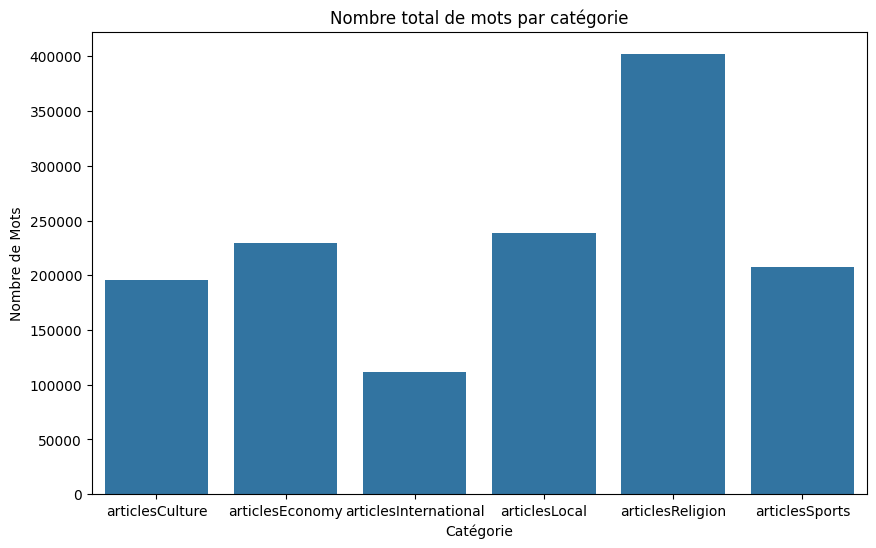

Nombre total de mots distincts : 17561


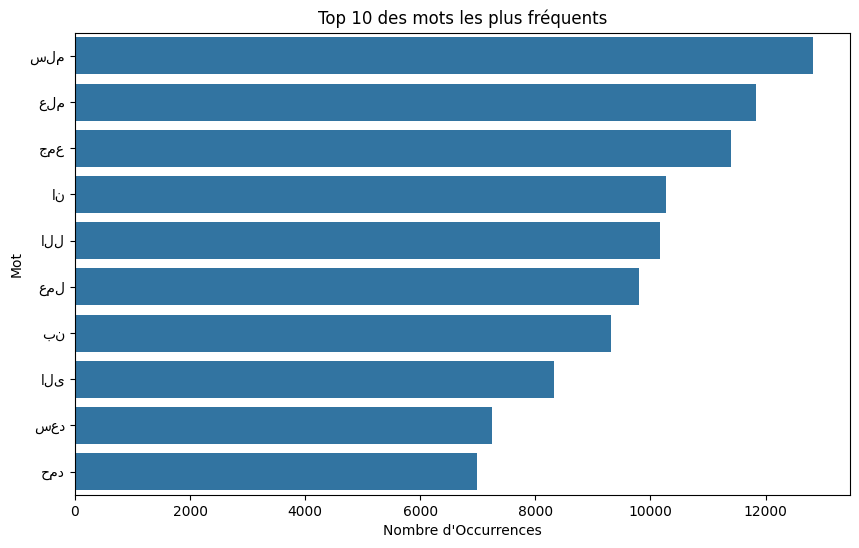

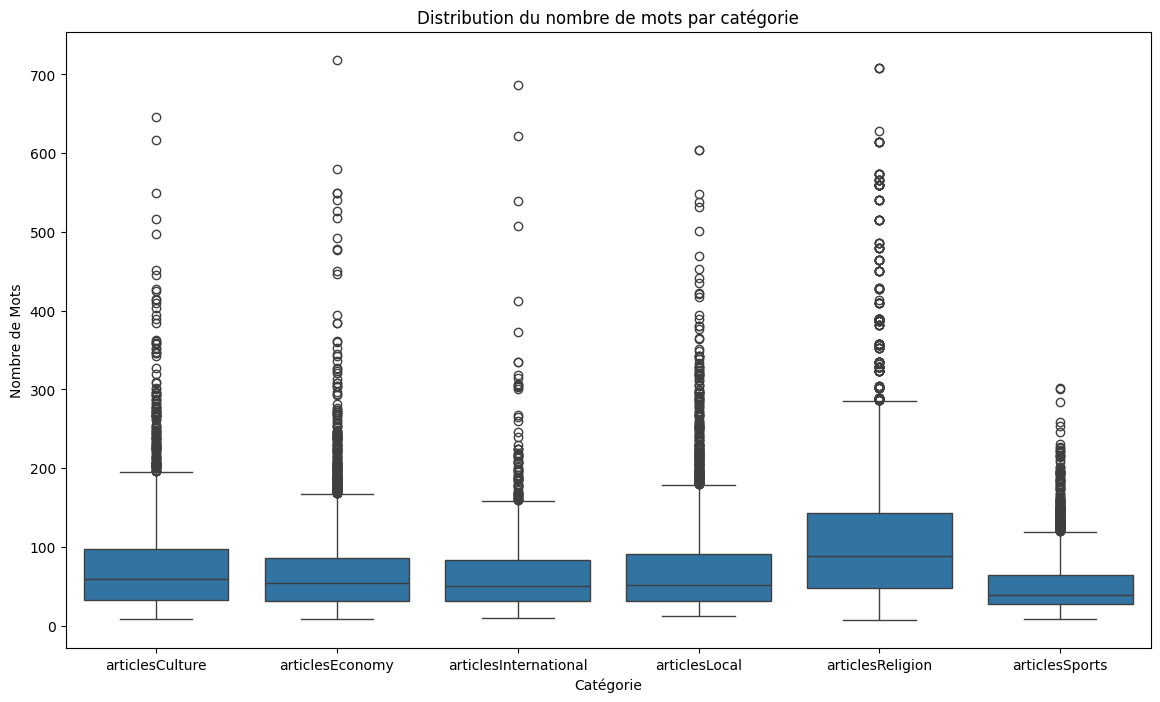

In [4]:
# Grouper le DataFrame par catégorie
groupes_par_categorie = df.groupby('Catégorie')['tokens_lemmatization']

# Mots les plus fréquents par catégorie
mots_freq_max_par_categorie = groupes_par_categorie.apply(lambda x: pd.Series([mot for sublist in x for mot in sublist]).value_counts().idxmax())
mots_freq_max_par_categorie = mots_freq_max_par_categorie.reset_index()
mots_freq_max_par_categorie.columns = ['Catégorie', 'Mot le plus fréquent']
print('Mots les plus fréquents par catégorie :\n', mots_freq_max_par_categorie)

# Mots les moins fréquents par catégorie
mots_freq_min_par_categorie = groupes_par_categorie.apply(lambda x: pd.Series([mot for sublist in x for mot in sublist]).value_counts().idxmin())
mots_freq_min_par_categorie = mots_freq_min_par_categorie.reset_index()
mots_freq_min_par_categorie.columns = ['Catégorie', 'Mot le moins fréquent']
print('\nMots les moins fréquents par catégorie :\n', mots_freq_min_par_categorie)

# Visualisations
# Nombre total de mots par catégorie
plt.figure(figsize=(10, 6))
sns.barplot(x=mots_par_categorie.index, y=mots_par_categorie.values)
plt.title('Nombre total de mots par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de Mots')
plt.show()

# Nombre total de mots distincts
print(f"Nombre total de mots distincts : {nombre_mots_distincts}")

# Mots les plus fréquents
top_mots = mots_freq.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mots.values, y=top_mots.index, orient='h')
plt.title('Top 10 des mots les plus fréquents')
plt.xlabel('Nombre d\'Occurrences')
plt.ylabel('Mot')
plt.show()

# Visualisation de mots par catégorie
plt.figure(figsize=(14, 8))
sns.boxplot(x='Catégorie', y='Nombre de Mots', data=df)
plt.title('Distribution du nombre de mots par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de Mots')
plt.show()


In [5]:
from collections import Counter

# Concaténer tous les tokens_lemmatization de toutes les lignes en une seule liste
all_tokens = [mot for sublist in df['tokens_lemmatization'] for mot in sublist]

# Calculer les fréquences de chaque mot
freq_mots = Counter(all_tokens)

# Spécifier le seuil de fréquence (par exemple, supprimer les mots qui apparaissent plus de 100 fois)
seuil_freq = 1000
mots_a_supprimer = [mot for mot, freq in freq_mots.items() if freq > seuil_freq]

# Supprimer les mots fréquents de chaque liste de tokens_lemmatization
df['tokens_sans_mots_frequents'] = df['tokens_lemmatization'].apply(lambda tokens: [mot for mot in tokens if mot not in mots_a_supprimer])

# Afficher le nouveau DataFrame
print(df[['Catégorie', 'Nom du Fichier', 'tokens_sans_mots_frequents']].head())


         Catégorie       Nom du Fichier  \
0  articlesCulture     culturecapr1.txt   
1  articlesCulture  culturecapr1005.txt   
2  articlesCulture  culturecapr1006.txt   
3  articlesCulture  culturecapr1007.txt   
4  articlesCulture  culturecapr1008.txt   

                          tokens_sans_mots_frequents  
0  [رحب, رمج, يفز, ذعة, رنمج, سمر, طول, برل, ايو,...  
1  [يصل, بيم, ترث, اقم, قرم, رعى, عنتر, ترث, احتف...  
2  [رستاق, نزى, حظت, جماهيرية, وسع, شدة, همم, ؤكد...  
3  [حور, خلد, عبداللطيف, نقش, ضلع, مفاهيم, فان, ن...  
4  [بقع, وسق, يحى, نئب, واش, لوح, لوح, صوف, ضغط, ...  


Nombre total de mots dans la colonne 'tokens_sans_mots_frequents' : 675225
طور             1000
اهل              999
رجع              999
الا              997
ندة              994
                ... 
كشمول              1
وأعتبروه           1
مستشاريه           1
لاستخدامه          1
فيسيرستاديوم       1
Name: count, Length: 17268, dtype: int64


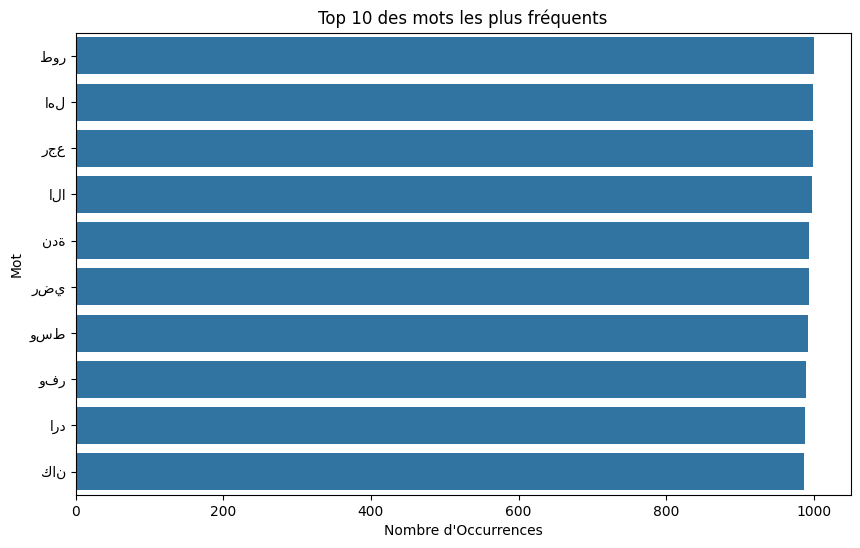

In [6]:
# Calculer le nombre total de mots dans la colonne 'tokens_sans_mots_frequents'
nombre_total_mots = df['tokens_sans_mots_frequents'].apply(len).sum()

# Afficher le résultat
print(f"Nombre total de mots dans la colonne 'tokens_sans_mots_frequents' : {nombre_total_mots}")

# Mots les plus fréquents
mots_freq = pd.Series([mot for sublist in df['tokens_sans_mots_frequents'] for mot in sublist]).value_counts()
print(mots_freq)
# Mots les plus fréquents
top_mots = mots_freq.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mots.values, y=top_mots.index, orient='h')
plt.title('Top 10 des mots les plus fréquents')
plt.xlabel('Nombre d\'Occurrences')
plt.ylabel('Mot')
plt.show()

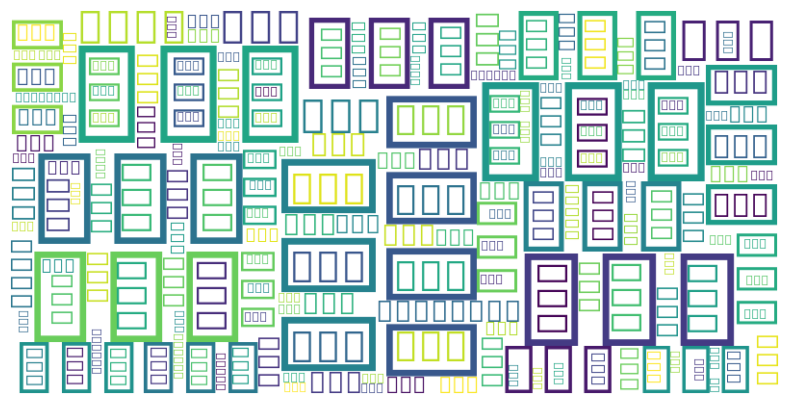

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer tous les tokens_sans_mots_frequents de toutes les lignes en une seule liste
all_tokens_sans_mots_frequents = [mot for sublist in df['tokens_sans_mots_frequents'] for mot in sublist]

# Créer une chaîne de texte à partir de la liste de mots
texte = ' '.join(all_tokens_sans_mots_frequents)

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
# Créer un nouveau DataFrame avec chaque mot de la colonne 'Tokens' comme colonne
df_tokens_separes = pd.DataFrame(df['tokens_sans_mots_frequents'].tolist(), columns=[f'Mot_{i}' for i in range(df['tokens_sans_mots_frequents'].apply(len).max())])
df_tokens_separes['categorie']=df['Catégorie']

# Afficher le nouveau DataFrame
print(df_tokens_separes.head())

   Mot_0 Mot_1      Mot_2     Mot_3 Mot_4   Mot_5 Mot_6 Mot_7     Mot_8 Mot_9  \
0    رحب   رمج        يفز       ذعة  رنمج     سمر   طول   برل       ايو   ونو   
1    يصل   بيم        ترث       اقم   قرم     رعى  عنتر   ترث  احتفالية   تلت   
2  رستاق   نزى        حظت  جماهيرية   وسع     شدة   همم   ؤكد       شكك   ترع   
3    حور   خلد  عبداللطيف       نقش   ضلع  مفاهيم   فان   نقش      تكون   فئد   
4    بقع   وسق        يحى       نئب   واش     لوح   لوح   صوف       ضغط   وبق   

   ... Mot_378 Mot_379 Mot_380 Mot_381 Mot_382 Mot_383 Mot_384 Mot_385  \
0  ...    None    None    None    None    None    None    None    None   
1  ...    None    None    None    None    None    None    None    None   
2  ...    None    None    None    None    None    None    None    None   
3  ...    None    None    None    None    None    None    None    None   
4  ...    None    None    None    None    None    None    None    None   

  Mot_386        categorie  
0    None  articlesCulture  
1    None 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir les NaN en chaînes vides pour éviter les erreurs lors de la vectorisation
df_tokens_separes = df_tokens_separes.fillna('')
df_tokens=df_tokens_separes.drop('categorie',axis=1)

# Convertir chaque ligne du DataFrame en une chaîne de texte
texte_documents = df_tokens_separes.apply(lambda row: ' '.join(row), axis=1)

# Initialiser le vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Appliquer le TF-IDF sur le DataFrame
tfidf_matrix = tfidf_vectorizer.fit_transform(texte_documents)

# Créer un nouveau DataFrame avec les résultats de la vectorisation TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Afficher le nouveau DataFrame TF-IDF
print(df_tfidf.head())


   articlesculture  articleseconomy  articlesinternational  articleslocal  \
0         0.019419              0.0                    0.0            0.0   
1         0.052647              0.0                    0.0            0.0   
2         0.078753              0.0                    0.0            0.0   
3         0.038274              0.0                    0.0            0.0   
4         0.090511              0.0                    0.0            0.0   

   articlesreligion  articlessports  ءاذ  ءاي  ءمن  آبء  ...  يونخ  \
0               0.0             0.0  0.0  0.0  0.0  0.0  ...   0.0   
1               0.0             0.0  0.0  0.0  0.0  0.0  ...   0.0   
2               0.0             0.0  0.0  0.0  0.0  0.0  ...   0.0   
3               0.0             0.0  0.0  0.0  0.0  0.0  ...   0.0   
4               0.0             0.0  0.0  0.0  0.0  0.0  ...   0.0   

   يونيسيفيوم  يونيفيرسدادي  يوه   يي  ييا  يير  ييس  ييك  يين  
0         0.0           0.0  0.0  0.0  0.0  0.0  0.

In [10]:
# Nombre d'attributs TF-IDF
nombre_attributs_tfidf = df_tfidf.shape[1]
print("Nombre d'attributs TF-IDF :", nombre_attributs_tfidf)

# Pourcentage de zéros dans la matrice TF-IDF
pourcentage_zeros_tfidf = (df_tfidf == 0).sum().sum() / (df_tfidf.shape[0] * df_tfidf.shape[1]) * 100
print("Pourcentage de zéros dans la matrice TF-IDF :", pourcentage_zeros_tfidf)

Nombre d'attributs TF-IDF : 17273


Pourcentage de zéros dans la matrice TF-IDF : 99.82158358074359


In [11]:
from sklearn.decomposition import PCA

# Appliquer PCA avec 50 composantes principales
nombre_composantes = 50
pca = PCA(n_components=nombre_composantes)
pca_resultats = pca.fit_transform(df_tfidf)

# Créer un DataFrame avec les résultats de la PCA
df_pca = pd.DataFrame(data=pca_resultats, columns=[f'PC{i}' for i in range(1, nombre_composantes + 1)])



In [12]:
# Afficher le nouveau DataFrame PCA
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.032864 -0.054459  0.067865  0.001980 -0.026783  0.004130 -0.017219   
1  0.010733 -0.031701  0.046413 -0.008091  0.032659  0.025294 -0.006290   
2 -0.010110 -0.021641  0.021404 -0.004506 -0.011097 -0.042416 -0.015469   
3  0.017545 -0.089096  0.002463 -0.006798  0.010130 -0.012506  0.014884   
4  0.001929 -0.029412  0.028903 -0.008428 -0.005433  0.016794 -0.029902   

        PC8       PC9      PC10  ...      PC41      PC42      PC43      PC44  \
0 -0.168086  0.113907  0.051750  ...  0.046676  0.015819 -0.016323 -0.111491   
1 -0.030869  0.058382 -0.040575  ... -0.082946  0.019441 -0.004645  0.071249   
2 -0.004912  0.115150 -0.029390  ...  0.017909  0.006434 -0.014599 -0.003849   
3 -0.090795  0.071728 -0.026094  ... -0.001405  0.031020 -0.003554  0.026905   
4 -0.026751  0.045373 -0.049029  ... -0.001099 -0.008651 -0.016855 -0.015988   

       PC45      PC46      PC47      PC48      PC49      PC50  
0  0

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Spécifier le nombre de clusters (k)
nombre_clusters = 6

# Initialiser le modèle K-means
kmeans = KMeans(n_clusters=nombre_clusters, random_state=42)

clusters_predits = kmeans.fit_predict(df_pca)

# Calculer l'indice de silhouette
silhouette_avg = silhouette_score(df_pca, clusters_predits)

print(f'Indice de silhouette : {silhouette_avg}')


# Ajouter la colonne des clusters à la dataframe
df_pca['Cluster'] = clusters_predits

# Afficher le résultat
print(df_pca.head())

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Indice de silhouette : 0.03935460896301078
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.032864 -0.054459  0.067865  0.001980 -0.026783  0.004130 -0.017219   
1  0.010733 -0.031701  0.046413 -0.008091  0.032659  0.025294 -0.006290   
2 -0.010110 -0.021641  0.021404 -0.004506 -0.011097 -0.042416 -0.015469   
3  0.017545 -0.089096  0.002463 -0.006798  0.010130 -0.012506  0.014884   
4  0.001929 -0.029412  0.028903 -0.008428 -0.005433  0.016794 -0.029902   

        PC8       PC9      PC10  ...      PC42      PC43      PC44      PC45  \
0 -0.168086  0.113907  0.051750  ...  0.015819 -0.016323 -0.111491  0.064222   
1 -0.030869  0.058382 -0.040575  ...  0.019441 -0.004645  0.071249  0.031175   
2 -0.004912  0.115150 -0.029390  ...  0.006434 -0.014599 -0.003849 -0.045368   
3 -0.090795  0.071728 -0.026094  ...  0.031020 -0.003554  0.026905 -0.004959   
4 -0.026751  0.045373 -0.049029  ... -0.008651 -0.016855 -0.015988 -0.019090   

       PC46      PC47    

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Indice de silhouette : 0.6420947914820487
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.032864 -0.054459  0.067865  0.001980 -0.026783  0.004130 -0.017219   
1  0.010733 -0.031701  0.046413 -0.008091  0.032659  0.025294 -0.006290   
2 -0.010110 -0.021641  0.021404 -0.004506 -0.011097 -0.042416 -0.015469   
3  0.017545 -0.089096  0.002463 -0.006798  0.010130 -0.012506  0.014884   
4  0.001929 -0.029412  0.028903 -0.008428 -0.005433  0.016794 -0.029902   

        PC8       PC9      PC10  ...      PC42      PC43      PC44      PC45  \
0 -0.168086  0.113907  0.051750  ...  0.015819 -0.016323 -0.111491  0.064222   
1 -0.030869  0.058382 -0.040575  ...  0.019441 -0.004645  0.071249  0.031175   
2 -0.004912  0.115150 -0.029390  ...  0.006434 -0.014599 -0.003849 -0.045368   
3 -0.090795  0.071728 -0.026094  ...  0.031020 -0.003554  0.026905 -0.004959   
4 -0.026751  0.045373 -0.049029  ... -0.008651 -0.016855 -0.015988 -0.019090   

       PC46      PC47     

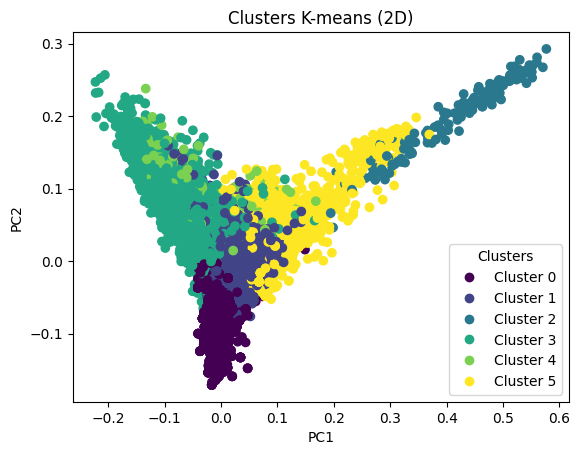

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Spécifier le nombre de clusters (k)
nombre_clusters = 6

# Initialiser le modèle K-means
kmeans = KMeans(n_clusters=nombre_clusters, random_state=42)

clusters_predits = kmeans.fit_predict(df_pca)

# Calculer l'indice de silhouette
silhouette_avg = silhouette_score(df_pca, clusters_predits)

print(f'Indice de silhouette : {silhouette_avg}')

# Ajouter la colonne des clusters à la dataframe
df_pca['Cluster'] = clusters_predits

# Afficher le résultat
print(df_pca.head())

# Visualisation des clusters (2D - choisissez deux composantes principales)
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=clusters_predits, cmap='viridis')
plt.title('Clusters K-means (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
legend_labels = [f'Cluster {i}' for i in range(nombre_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.show()

In [15]:
# Ajouter la colonne des clusters à la dataframe
df_pca['Cluster'] = clusters_predits

# Créer un DataFrame pour analyser les caractéristiques des clusters
df_cluster_analysis = pd.DataFrame({
    'Cluster': clusters_predits,
    'Categorie': df_tokens_separes['categorie']  # Assurez-vous que le nom de la colonne est correct
})

# Examiner la répartition des catégories dans chaque cluster
cluster_category_distribution = df_cluster_analysis.groupby(['Cluster', 'Categorie']).size().reset_index(name='Counts')
#print(cluster_category_distribution)

# Pour chaque cluster, obtenir la catégorie dominante
dominant_category_in_cluster = df_cluster_analysis.groupby('Cluster')['Categorie'].agg(lambda x: x.value_counts().idxmax()).reset_index(name='Dominant_Category')
print(dominant_category_in_cluster)

   Cluster Dominant_Category
0        0  articlesReligion
1        1     articlesLocal
2        2   articlesEconomy
3        3    articlesSports
4        4     articlesLocal
5        5   articlesEconomy


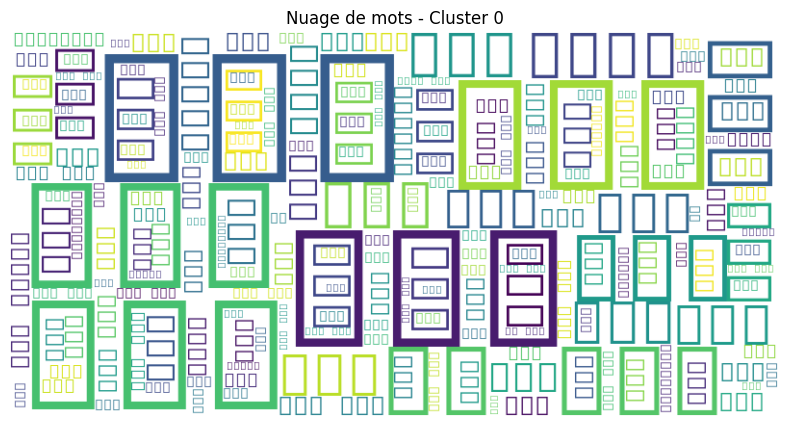

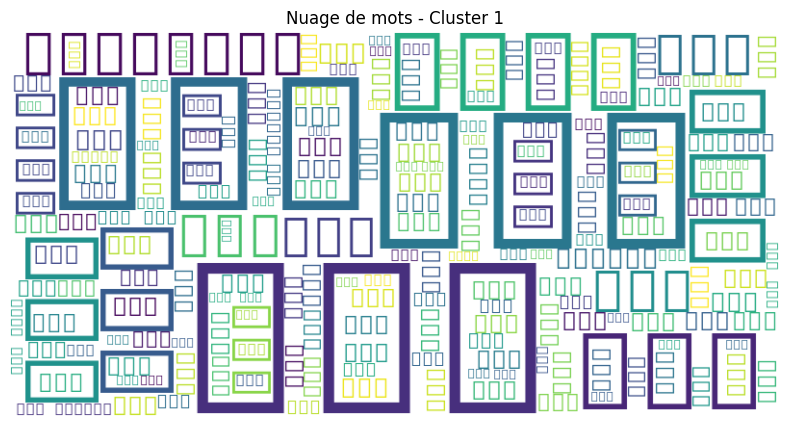

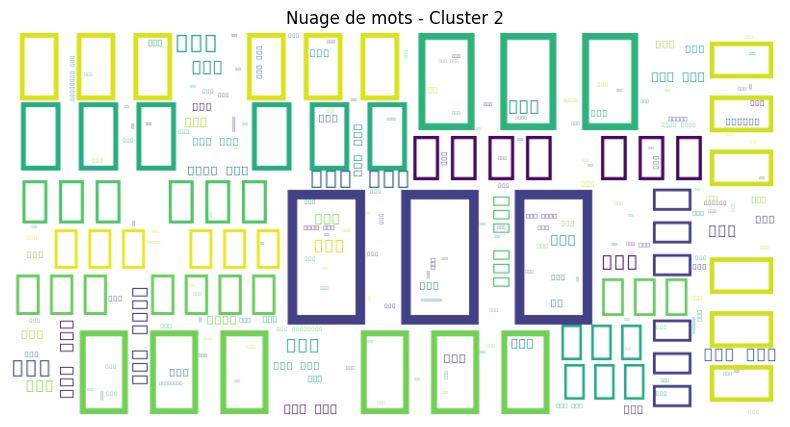

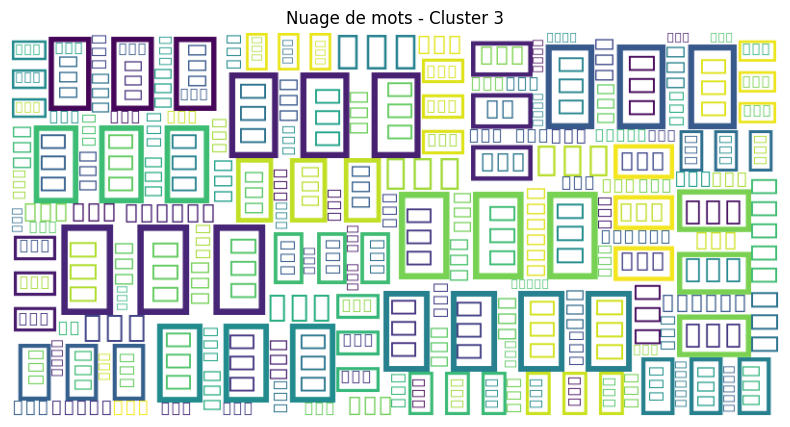

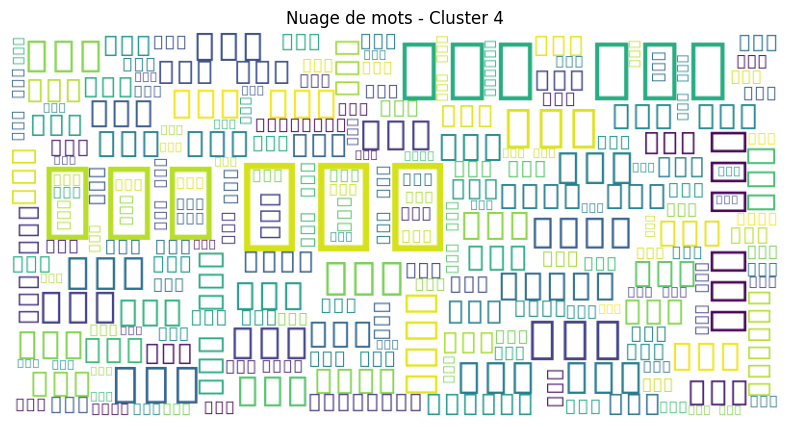

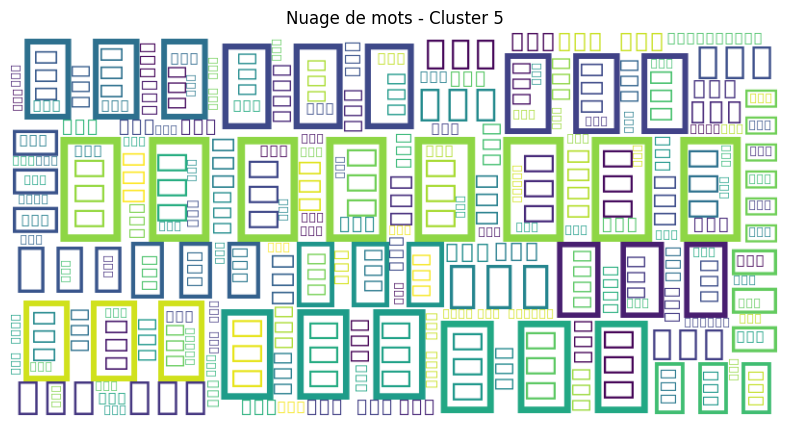

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ajouter la colonne des clusters à la dataframe
df_pca['Cluster'] = clusters_predits

# Initialiser une liste pour stocker les tokens_sans_mots_frequents par cluster
all_tokens_sans_mots_frequents_par_cluster = []

# Concaténer tous les tokens_sans_mots_frequents de toutes les lignes en une seule liste
for cluster in range(nombre_clusters):
    mots_cluster = [mot for sublist in df[df_pca['Cluster'] == cluster]['tokens_sans_mots_frequents'] for mot in sublist]
    all_tokens_sans_mots_frequents_par_cluster.append(mots_cluster)

# Créer une chaîne de texte pour chaque cluster
texte_par_cluster = [' '.join(mots_cluster) for mots_cluster in all_tokens_sans_mots_frequents_par_cluster]

# Créer un nuage de mots pour chaque cluster
for cluster, texte_cluster in enumerate(texte_par_cluster):
    # Créer un nuage de mots pour le cluster actuel
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_cluster)

    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nuage de mots - Cluster {cluster}')
    plt.axis('off')
    plt.show()


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir les NaN en chaînes vides pour éviter les erreurs lors de la vectorisation
df_tokens_separes = df_tokens_separes.fillna('')
df_tokens=df_tokens_separes.drop('categorie',axis=1)
# Convertir chaque ligne du DataFrame en une chaîne de texte
texte_documents =df_tokens.apply(lambda row: ' '.join(row), axis=1)

# Initialiser le vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Appliquer le TF-IDF sur le DataFrame
tfidf_matrix = tfidf_vectorizer.fit_transform(texte_documents)

# Créer un nouveau DataFrame avec les résultats de la vectorisation TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Afficher le nouveau DataFrame TF-IDF
print(df_tfidf.head())

   ءاذ  ءاي  ءمن  آبء  آبر  آتم  آتى  آثر  آخذ  آخر  ...  يونخ  يونيسيفيوم  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0         0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0         0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0         0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0         0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0         0.0   

   يونيفيرسدادي  يوه   يي  ييا  يير  ييس  ييك  يين  
0           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 17267 columns]


In [18]:
from sklearn.decomposition import NMF

# Spécifiez le nombre de thèmes à extraire (nombre de clusters)
nombre_themes = 6

# Initialiser le modèle NMF
nmf = NMF(n_components=nombre_themes, random_state=42)

# Appliquer le modèle NMF sur les données TF-IDF
themes_predits = nmf.fit_transform(df_tfidf)

# Ajouter les colonnes des thèmes à la dataframe
for i in range(nombre_themes):
    df[f'Theme_{i}'] = themes_predits[:, i]


# Vous pouvez également explorer les termes les plus importants par thème
feature_names = tfidf_vectorizer.get_feature_names_out()
for i, topic in enumerate(nmf.components_):
    print(f"Theme {i}:")
    print(" ".join([feature_names[idx] for idx in topic.argsort()[:-10 - 1:-1]]))
    print("\n")

Theme 0:
روح لحج قرء رحم لأن خطب سبح امة زوج علماء


Theme 1:
ملي بقم الة قرن ائة داول ورق رحب سند كمة


Theme 2:
نزى ندة غرف رعى عضء رنمج هيئ دئر ربو وفد


Theme 3:
كرة لقب جول ونس اثي صفر بري قطر صين رصد


Theme 4:
غلق سعر ؤشر بيس صعد خفض بنك ائة رجع اما


Theme 5:
صلل ظفر خرف وسم رفه دهش ترث اطر قرة فرع




In [19]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Calculer la divergence KL entre les distributions de probabilité des termes
kl_divergences = []
for i, topic in enumerate(nmf.components_):
    kl_divergence = np.sum(topic * np.log(topic / df_tfidf.sum(axis=0)))
    kl_divergences.append(kl_divergence)

# Afficher les divergences KL par thème
for i, kl_divergence in enumerate(kl_divergences):
    print(f"Theme {i}: KL Divergence = {kl_divergence}")

# Évaluer l'interprétabilité des thèmes
for i, topic in enumerate(nmf.components_):
    top_terms = [feature_names[idx] for idx in topic.argsort()[:-10 - 1:-1]]
    print(f"Theme {i}: Top Terms = {', '.join(top_terms)}")


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Theme 0: KL Divergence = -990.8250563568463
Theme 1: KL Divergence = -109.67365766306963
Theme 2: KL Divergence = -449.26673543019973
Theme 3: KL Divergence = -424.80662327014835
Theme 4: KL Divergence = -103.57830809948625
Theme 5: KL Divergence = -146.89649356487155
Theme 0: Top Terms = روح, لحج, قرء, رحم, لأن, خطب, سبح, امة, زوج, علماء
Theme 1: Top Terms = ملي, بقم, الة, قرن, ائة, داول, ورق, رحب, سند, كمة
Theme 2: Top Terms = نزى, ندة, غرف, رعى, عضء, رنمج, هيئ, دئر, ربو, وفد
Theme 3: Top Terms = كرة, لقب, جول, ونس, اثي, صفر, بري, قطر, صين, رصد
Theme 4: Top Terms = غلق, سعر, ؤشر, بيس, صعد, خفض, بنك, ائة, رجع, اما
Theme 5: Top Terms = صلل, ظفر, خرف, وسم, رفه, دهش, ترث, اطر, قرة, فرع


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, df['Catégorie'], test_size=0.2, random_state=42)

# Initialiser le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins (n_neighbors) selon vos besoins

# Entraîner le modèle sur l'ensemble d'entraînement
knn.fit(X_train, y_train)

# Prédire les étiquettes de classe sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle KNN : {accuracy}")

# Afficher le rapport de classification
print("Rapport de Classification :\n", classification_report(y_test, y_pred))


Précision du modèle KNN : 0.7719058050383352
Rapport de Classification :
                        precision    recall  f1-score   support

      articlesCulture       0.77      0.54      0.64       480
      articlesEconomy       0.72      0.72      0.72       658
articlesInternational       0.80      0.71      0.75       323
        articlesLocal       0.60      0.77      0.68       697
     articlesReligion       0.88      0.99      0.93       681
       articlesSports       0.91      0.79      0.85       813

             accuracy                           0.77      3652
            macro avg       0.78      0.75      0.76      3652
         weighted avg       0.78      0.77      0.77      3652



In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Définir le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins (n_neighbors) selon vos besoins

# Définir les caractéristiques (X) et les étiquettes (y)
X = df_tfidf
y = df['Catégorie']

# Définir la stratégie de validation croisée
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Effectuer la validation croisée
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

# Afficher les scores pour chaque itération
print("Scores de validation croisée :", scores)

# Afficher la moyenne des scores
print("Moyenne des scores de validation croisée :", scores.mean())


Scores de validation croisée : [0.76834611 0.78033416 0.77704738 0.77704738 0.78334703]
Moyenne des scores de validation croisée : 0.7772244127027269


In [31]:
print(df.head(1))

         Catégorie    Nom du Fichier  \
0  articlesCulture  culturecapr1.txt   

                                             Contenu  \
0  كتب سالم الرحبي  تنطلق اليوم الدورة البرامجية ...   

                                              Tokens  \
0  [كتب, سالم, الرحبي, تنطلق, اليوم, الدورة, البر...   

                                tokens_lemmatization  Nombre de Mots  \
0  [كتب, سلم, رحب, طلق, اليوم, دور, رمج, جدد, يفز...             403   

                          tokens_sans_mots_frequents   Theme_0  Theme_1  \
0  [رحب, رمج, يفز, ذعة, رنمج, سمر, طول, برل, ايو,...  0.028192      0.0   

    Theme_2  Theme_3  Theme_4   Theme_5  
0  0.048618      0.0      0.0  0.000306  


In [34]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Définir les caractéristiques (X) et les étiquettes (y)
X = df['tokens_sans_mots_frequents']
y = df['Catégorie']

X = [' '.join(tokens) for tokens in df['tokens_sans_mots_frequents']]

# Vectoriser les données textuelles en utilisant TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Définir le modèle KNN
knn = KNeighborsClassifier()

# Définir la grille d'hyperparamètres à tester
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Initialiser la recherche sur grille
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Afficher la meilleure précision
print("Meilleure précision :", grid_search.best_score_)

# Évaluer le modèle sur l'ensemble de test
meilleur_modele = grid_search.best_estimator_
precision_test = meilleur_modele.score(X_test, y_test)
print("Précision sur l'ensemble de test :", precision_test)


Meilleurs hyperparamètres : {'n_neighbors': 9, 'weights': 'distance'}
Meilleure précision : 0.7786907045344764
Précision sur l'ensemble de test : 0.7814895947426068


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Définir les caractéristiques (X) et les étiquettes (y)
X = df['tokens_sans_mots_frequents']
y = df['Catégorie']

X = [' '.join(tokens) for tokens in df['tokens_sans_mots_frequents']]

# Encoder les étiquettes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tokenizer et séquençage des textes
max_words = 10000  # Nombre maximum de mots à considérer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Paddage des séquences pour avoir une longueur uniforme
max_sequence_length = 200  # Longueur maximale des séquences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Construire le modèle de réseau de neurones
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(100, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Évaluer le modèle sur l'ensemble de test
accuracy_test = model.evaluate(X_test_padded, y_test)[1]
print("Précision sur l'ensemble de test :", accuracy_test)





Epoch 1/5


366/366 [==============================] - 33s 85ms/step - loss: 1.3075 - accuracy: 0.4784 - val_loss: 0.8887 - val_accuracy: 0.6611
Epoch 2/5
366/366 [==============================] - 31s 86ms/step - loss: 0.6040 - accuracy: 0.7844 - val_loss: 0.5135 - val_accuracy: 0.8210
Epoch 3/5
366/366 [==============================] - 32s 87ms/step - loss: 0.2994 - accuracy: 0.9019 - val_loss: 0.4597 - val_accuracy: 0.8418
Epoch 4/5
366/366 [==============================] - 33s 90ms/step - loss: 0.1949 - accuracy: 0.9377 - val_loss: 0.4867 - val_accuracy: 0.8446
Epoch 5/5
115/115 [==============================] - 7s 64ms/step - loss: 0.6189 - accuracy: 0.8234
Précision sur l'ensemble de test : 0.8233844637870789


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Définir les caractéristiques (X) et les étiquettes (y)
X = df_tfidf
y = df['Catégorie']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle
decision_tree.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = decision_tree.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle Decision Tree :", accuracy)

# Afficher le rapport de classification
report = classification_report(y_test, y_pred)
print("Rapport de Classification :\n", report)


Précision du modèle Decision Tree : 0.7108433734939759
Rapport de Classification :
                        precision    recall  f1-score   support

      articlesCulture       0.60      0.51      0.55       480
      articlesEconomy       0.62      0.62      0.62       658
articlesInternational       0.63      0.61      0.62       323
        articlesLocal       0.60      0.57      0.58       697
     articlesReligion       0.85      1.00      0.92       681
       articlesSports       0.82      0.83      0.83       813

             accuracy                           0.71      3652
            macro avg       0.69      0.69      0.69      3652
         weighted avg       0.70      0.71      0.71      3652



In [ ]:
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

# Exporter le texte de l'arbre (pour une visualisation textuelle)
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print("Règles de l'arbre de décision :\n", tree_rules)

# Exporter l'arbre au format DOT (Graphviz)
dot_data = export_graphviz(
    decision_tree,
    out_file=None,
    feature_names=list(X.columns),
    class_names=decision_tree.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualiser l'arbre avec Graphviz
graph = graphviz.Source(dot_data, filename="path/to/dot", format="png")
graph.render("decision_tree", format="png", cleanup=True)
graph.view("decision_tree")


Règles de l'arbre de décision :
 |--- كرة <= 0.06
|   |--- دنا <= 0.04
|   |   |--- لقب <= 0.06
|   |   |   |--- سعر <= 0.02
|   |   |   |   |--- علماء <= 0.03
|   |   |   |   |   |--- اثي <= 0.07
|   |   |   |   |   |   |--- اقتصادية <= 0.07
|   |   |   |   |   |   |   |--- اله <= 0.04
|   |   |   |   |   |   |   |   |--- صفر <= 0.08
|   |   |   |   |   |   |   |   |   |--- ربو <= 0.04
|   |   |   |   |   |   |   |   |   |   |--- قوت <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 411
|   |   |   |   |   |   |   |   |   |   |--- قوت >  0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 31
|   |   |   |   |   |   |   |   |   |--- ربو >  0.04
|   |   |   |   |   |   |   |   |   |   |--- فشل <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- فشل >  0.06
|   |   |   |   |   |   |   |   |   |   |   |--- class: articlesReligion
|   |   |   |   |   |

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.188296 to fit
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.188296 to fit


'decision_tree.png'